In [1]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
# read in data (raw counts from RNA-seq or Quantseq)
data = pd.read_csv("htseq_all_counts_AM.csv", index_col=0)

In [3]:
# check data format
data.head()

,M01.AM.1F968.CD11c.Mid.01,M01.AM.1F970.CD11c.Mid.02,M01.AM.1F971.CD11c.Mid.03,M01.AM.1F973.CD11c.Mid.04,M01.AM.2M118.LysM.Mid.01,M01.AM.2M121.LysM.Mid.02,M01.AM.2M125.LysM.Mid.03,M01.AM.2M126.LysM.Mid.04,M01.AM.M859.Ctrl.Mid.01,M01.AM.M862.Ctrl.Mid.02,M01.AM.M863.Ctrl.Mid.03,M01.AM.M864.Ctrl.Mid.04
ENSMUSG00000000001,1422,1014,877,1157,2020,1679,1314,1353,741,1385,1101,2246
ENSMUSG00000000003,0,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000000028,38,38,19,37,59,55,57,35,23,59,30,105
ENSMUSG00000000031,0,0,0,0,0,1,0,1,0,0,0,0
ENSMUSG00000000037,0,1,0,1,0,2,0,1,3,2,1,2


In [4]:
# prepare variables for later steps
index = data.columns
genes = data.index

In [5]:
# center and scale data before PCA, by passing transposed data
scaled_data = preprocessing.scale(data.T)

# another way to scale data
# StandardScaler().fit_transform(data.T)

In [6]:
# define a PCA object
pca=PCA()

In [7]:
# fit the scaled data, do all the PCA math
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
# generate coordinates for PCA graph based on loading scores and the scaled data
pca_data = pca.transform(scaled_data)

In [9]:
# calculate the percentage of variation for each principal component
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
# create labels for each principle component
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

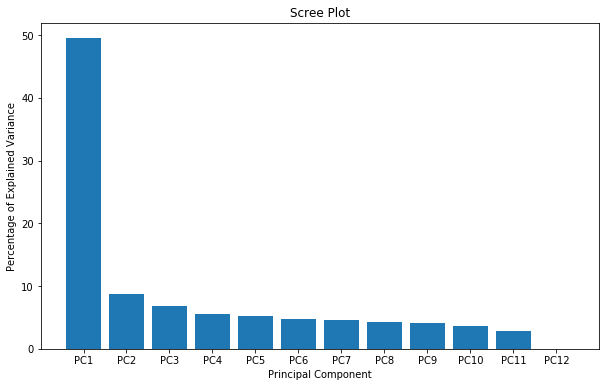

In [10]:
# generate scree plot
fig = plt.figure(figsize=(10,6))
x=range(1,len(per_var)+1)
plt.bar(x, height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

In [11]:
# generate data frame for PCA plot
pca_df = pd.DataFrame(pca_data, index=index, columns=labels)

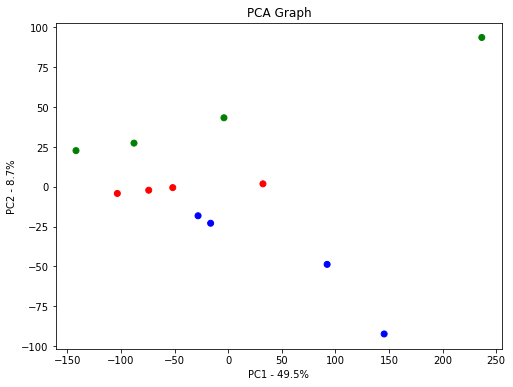

In [12]:
# generate PCA plot
fig = plt.figure(figsize=(8,6))
plt.scatter(pca_df.PC1, pca_df.PC2, c=['r','r','r','r','b','b','b','b','g','g','g','g'])
plt.title("PCA Graph")
plt.xlabel(f"PC1 - {per_var[0]}%")
plt.ylabel(f"PC2 - {per_var[1]}%")
# add sample names to the graph
# for sample in pca_df.index:
#     plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.show()

In [13]:
# based loading scores of PC1 find top 10 genes with most influence
loading_scores = pd.Series(pca.components_[0], index=genes)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

ENSMUSG00000071646    0.009431
ENSMUSG00000027365    0.009431
ENSMUSG00000048076    0.009431
ENSMUSG00000023048    0.009430
ENSMUSG00000023175    0.009430
ENSMUSG00000031819    0.009429
ENSMUSG00000006519    0.009428
ENSMUSG00000021248    0.009428
ENSMUSG00000013160    0.009426
ENSMUSG00000032562    0.009426
dtype: float64
